(4, 4)
TIME TAKEN: 0.5208969116210938 SECONDS
229
[[  -1.   68.   56.    0.]
 [  28.  255.  255.    0.]
 [   0.  257.  255.   72.]
 [   0.    0.   -2.    0.]]


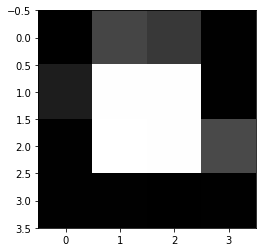

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Generate Random Image (Milestone 2)
Target = np.zeros((4, 4), np.uint8)
print(Target.shape)
'''
plt.imshow(Target, cmap = 'gray')
plt.title("Initialized at zero")
plt.show()
'''
Target[1][1] = 255
Target[1][2] = 255
Target[2][1] = 255
Target[2][2] = 255
'''
plt.imshow(Target, cmap = 'gray')
plt.title("Target")
plt.show()
'''
import operator
import time
def computeL1Distance(target, X):
    total = 0
    for i in range(4):
        for j in range(4):
            total += abs(int(target[i][j] - int(X[i][j])))
    return total
def getMin(target, generation):
    genMetrics = {}
    for i in range(len(generation)):
        distance = computeL1Distance(target, generation[i])
        index = i
        genMetrics.update({distance: index})
    sortedMetrics = sorted(genMetrics.items(), key=operator.itemgetter(0))
    Index = sortedMetrics[0][1]
    return Index
def Selection(target, generation):
    index = getMin(target, generation)
    parent = generation[index]
    return parent
def Mutate(target, parent):
    nextGen = []
    nextGen.append(parent)
    for i in range(9):
        Mut1 = np.zeros((4,4))
        for pX in range(4):
            for pY in range(4):
                Mut1[pX][pY] = parent[pX][pY]
        for x in range(4):
            for y in range(4):
                Mut1[x][y] += np.random.randint(-1,2)
        nextGen.append(Mut1)
    return nextGen
def Initialize():
    generation = []
    for i in range(10):
        entry = np.zeros((4,4), np.uint8)
        for i in range(4):
            for j in range(4):
                entry[i][j] = np.random.randint(0, 255)
        generation.append(entry)
    return generation
def Evolve(target, iterations):
    nextGen = [[[]]]
    for i in range(iterations):
        if (i == 0):
            nextGen = Initialize()
        parent = Selection(target, nextGen)
        nextGen = Mutate(target, parent)
    parent = Selection(target, nextGen)
    return parent

start = time.time()
Lebron = Evolve(Target, 500)
end = time.time()
print("TIME TAKEN: " + str(end-start) + " SECONDS")
print(computeL1Distance(Target, Lebron))
print(Lebron)
plt.imshow(Lebron, cmap = 'gray')
plt.show() 